<a href="https://colab.research.google.com/github/BaekJeongsuk/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_6%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 6강 - 데이터 전처리 1

### 6-1 데이터 훑어보기

In [ ]:
import pandas as pd
import numpy as np

data = {
    'name': ['김민수', '이지영', '박준호', '최서연', '정도윤'],
    'age': [25, 30, 28, 22, 35],
    'city': ['서울', '부산', '인천', '서울', '대전'],
    'score': [90, 85, 95, 80, np.nan]
}
df = pd.DataFrame(data)

# 데이터 측정
df.describe()

# 모든 데이터 타입 측정
df.describe(include='all')

# 수치형 데이터 측정
df.describe(include=[np.number])

# 범주형 데이터 측정
df.describe(include=['object'])

# 특정 열 분석
df['score'].describe()

,score
count,4.000000
mean,87.500000
std,6.454972
min,80.000000
25%,83.750000
50%,87.500000
75%,91.250000
max,95.000000


### 6-2 DataFrame 열 선택 및 **조작**

In [ ]:
import pandas as pd

data = {
    "이름": ["김철수", "이영희", "박민수", "최지훈", "정소희"],
    "학년": [1, 2, 3, 4, 2],
    "학점": [4.2, 3.8, 4.5, 3.9, 3.5],
    "학과": ["컴퓨터공학", "경영학", "전자공학", "의학", "심리학"],
    "동아리": ["프로그래밍", "독서토론", "로봇공학", "봉사활동", "음악감상"]
}
df = pd.DataFrame(data)

# 특정 열 선택
selected_col = df[['이름', '학과', '학점']]
selected_col
# DataFrame 열순서 변경
reordered_cols = df[['학과', '이름', '학년', '학점', '동아리']]
reordered_cols

# DataFrame 열이름 변경
df_renamed = df.rename(columns={'이름': '학생명', '학점': '평점', '동아리': '과외활동'})
df_renamed

,학생명,학년,평점,학과,과외활동
0,김철수,1,4.2,컴퓨터공학,프로그래밍
1,이영희,2,3.8,경영학,독서토론
2,박민수,3,4.5,전자공학,로봇공학
3,최지훈,4,3.9,의학,봉사활동
4,정소희,2,3.5,심리학,음악감상


### 6-3 DataFrame 행 선택

In [ ]:
import pandas as pd

data = {
    "이름": ["김철수", "이영희", "박민수", "최지훈", "정소희"],
    "학년": [1, 2, 3, 4, 2],
    "학점": [4.2, 3.8, 4.5, 3.9, 3.5],
    "학과": ["컴퓨터공학", "경영학", "전자공학", "의학", "심리학"],
    "동아리": ["프로그래밍", "독서토론", "로봇공학", "봉사활동", "음악감상"]
}

#DataFrame 인덱스 지정
df = pd.DataFrame(data)
df = df.set_index('이름')
df
#DataFrame 행 선택
df.loc['김철수']
df.loc[['김철수', '이영희']]
df.loc['김철수':'박민수'] #슬라이싱

#DataFrame 위치 기반 행 선택
df.iloc[1]
df.iloc[[2,3]]
df.iloc[1:3]

#DataFrame 조건 기반 선택
df.loc[[True, False, True, False, False]] #불리언 인덱싱
print(df['학점'])
df['학점'] >= 4.0
df.loc[df['학점'] >= 4.0]
df[df['학년']==2]
print(df[['학점', '학년']])
df[(['학년']==2) & (df['학점'] >= 3.7)]

이름
김철수    4.2
이영희    3.8
박민수    4.5
최지훈    3.9
정소희    3.5
Name: 학점, dtype: float64
      학점  학년
이름          
김철수  4.2   1
이영희  3.8   2
박민수  4.5   3
최지훈  3.9   4
정소희  3.5   2


,학년,학점,학과,동아리
이름,,,,


### 6-4 DataFrame 정렬

In [ ]:
import pandas as pd

data = {
    "이름": ["김철수", "이영희", "박민수", "최지훈", "정소희"],
    "학년": [1, 2, 3, 4, 2],
    "학점": [4.2, 3.8, 4.5, 3.9, 3.5],
    "학과": ["컴퓨터공학", "경영학", "전자공학", "의학", "심리학"],
    "동아리": ["프로그래밍", "독서토론", "로봇공학", "봉사활동", "음악감상"]
}

#DataFrame 인덱스 지정
df = pd.DataFrame(data)
df = df.set_index('이름')

df = pd.DataFrame(data).set_index('이름')

#DataFrame 단일 열 오름차순, 내림차순 정렬
df.sort_values(by='학점')
df.sort_values(by='학점', ascending=False)

#DataFrame 복수 열 오름차순, 내림차순 정렬
df.sort_values(by=['학년','학점'], ascending=[True, False])

#DataFrame 인덱스 기준 오른차순, 내림차순 정렬
df.sort_index(ascending=False)


,학년,학점,학과,동아리
이름,,,,
최지훈,4,3.9,의학,봉사활동
정소희,2,3.5,심리학,음악감상
이영희,2,3.8,경영학,독서토론
박민수,3,4.5,전자공학,로봇공학
김철수,1,4.2,컴퓨터공학,프로그래밍


## 6-5 실습 시나리오 - Kaggle을 활용한 데이터 수집 및 측정

- Kaggle([https://www.kaggle.com](https://www.kaggle.com)) 회원 가입
- Kaggle 접근 토큰 생성(API 키)


### Kaggle API 키 업로드

In [ ]:
from google.colab import files
files.upload()

### Kaggle API 키 사용을 위한 Colab 환경 설정

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Kaggle 데이터셋 다운로드

In [ ]:
!kaggle competitions download –c store-sales-time-series-forecasting

!unzip store-sales-time-series-forecasting.zip

### Kaggle 데이터셋 DataFrame 로드 및 살펴보기

In [ ]:
import pandas as pd

# Grocery Sales 데이터 DataFrame 로드

# 판매 데이터 살펴보기


### Kaggle 데이터셋 측정

In [ ]:
# 판매 데이터 기본 통계량

# 매장 데이터 기본 정보

# 원유 가격 데이터 기본 정보


In [2]:
import requests

def get_year_months():
    year_months = []
    for year in range(2015, 2024+1):
        for month in range(1, 12+1):
            year_months.append(f'{year}{month:02d}')
    return year_months

api_key = '72557745436261653436656d5a764d'
responses = []

for year_month in get_year_months():
    year = year_month[:4]
    month = year_month[4:]

    url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/100/{year}/{month}"

    try:
        response = requests.get(url)
        if response.status_code == 200:
           print(f"{year}-{month} api 호출 성공")
           data = response.json()
           responses.append(data)
        else:
           print(f"{year}-{month} api 호출 실패: {response.status_code}")
    except Exception as e:
        print(f"{year}-{month} api 호출 예외: {e}")

2015-01 api 호출 성공
2015-02 api 호출 성공
2015-03 api 호출 성공
2015-04 api 호출 성공
2015-05 api 호출 성공
2015-06 api 호출 성공
2015-07 api 호출 성공
2015-08 api 호출 성공
2015-09 api 호출 성공
2015-10 api 호출 성공
2015-11 api 호출 성공
2015-12 api 호출 성공
2016-01 api 호출 성공
2016-02 api 호출 성공
2016-03 api 호출 성공
2016-04 api 호출 성공
2016-05 api 호출 성공
2016-06 api 호출 성공
2016-07 api 호출 성공
2016-08 api 호출 성공
2016-09 api 호출 성공
2016-10 api 호출 성공
2016-11 api 호출 성공
2016-12 api 호출 성공
2017-01 api 호출 성공
2017-02 api 호출 성공
2017-03 api 호출 성공
2017-04 api 호출 성공
2017-05 api 호출 성공
2017-06 api 호출 성공
2017-07 api 호출 성공
2017-08 api 호출 성공
2017-09 api 호출 성공
2017-10 api 호출 성공
2017-11 api 호출 성공
2017-12 api 호출 성공
2018-01 api 호출 성공
2018-02 api 호출 성공
2018-03 api 호출 성공
2018-04 api 호출 성공
2018-05 api 호출 성공
2018-06 api 호출 성공
2018-07 api 호출 성공
2018-08 api 호출 성공
2018-09 api 호출 성공
2018-10 api 호출 성공
2018-11 api 호출 성공
2018-12 api 호출 성공
2019-01 api 호출 성공
2019-02 api 호출 성공
2019-03 api 호출 성공
2019-04 api 호출 성공
2019-05 api 호출 성공
2019-06 api 호출 성공
2019-07 api 호출 성공
2019-08 ap

In [3]:
import pandas as pd

data_list = []

for res in responses:
    rows = res["energyUseDataSummaryInfo"]["row"]
    data_list.extend(rows)


df = pd.DataFrame(data_list)

#기본 정보 확인

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      840 non-null    object
 1   MON       840 non-null    object
 2   MM_TYPE   840 non-null    object
 3   CNT       840 non-null    object
 4   EUS       840 non-null    object
 5   EUS1      840 non-null    object
 6   EUS2      840 non-null    object
 7   ECO2_1    840 non-null    object
 8   ECO2_2    840 non-null    object
 9   GUS       840 non-null    object
 10  GUS1      840 non-null    object
 11  GUS2      840 non-null    object
 12  GCO2_1    840 non-null    object
 13  GCO2_2    840 non-null    object
 14  WUS       840 non-null    object
 15  WUS1      840 non-null    object
 16  WUS2      840 non-null    object
 17  WCO2_1    840 non-null    object
 18  WCO2_2    840 non-null    object
 19  HUS       840 non-null    object
 20  HUS1      840 non-null    object
 21  HUS2      840 no

,YEAR,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS1,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE
count,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
unique,10,12,7,746,840,840,840,840,840,840,...,837,837,837,837,301,299,300,290,290,119
top,2015,01,개인,2365,7922631,8361049,8016890,-266338.5,-266338.5,309429,...,0,0,0,0,0,0,0,0,0,2018-03-29 15:52:23.0
freq,84,70,120,8,1,1,1,1,1,1,...,4,4,4,4,524,524,524,549,549,14


In [4]:
df["MM_TYPE"] = df["MM_TYPE"].astype(str)
df_personal = df[df["MM_TYPE"] == "개인"]

selected_col = ["YEAR", "MON", "MM_TYPE", "EUS", "GUS", "WUS", "HUS"]
df_personal = df_personal[selected_col]
df_personal

,YEAR,MON,MM_TYPE,EUS,GUS,WUS,HUS
0,2015,01,개인,193784708,59133720,12819757.886,22740838.937
7,2015,02,개인,189974230,56487358,12656888.218,18793320.213
19,2015,03,개인,175215719,49984873,12655474.249,13826348.508
27,2015,04,개인,183891769,37306841,12954773.246,5836002.885
28,2015,05,개인,177289769,22060892,13086734.214,1320895.801
...,...,...,...,...,...,...,...
809,2024,08,개인,463971328,7072251,15873544.6,130082.263
813,2024,09,개인,409872908,5729131,15143321.6,3420507.136
819,2024,10,개인,282268119,8233421,15297669.9,2695491.396
830,2024,11,개인,257927956,17418221,14678672.5,8836296.454


In [5]:
def get_season(month):
    if month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "autumn"
    else:
        return "winter"

df_personal["season"] = df_personal["MON"].astype(int).apply(get_season)
df_personal

,YEAR,MON,MM_TYPE,EUS,GUS,WUS,HUS,season
0,2015,01,개인,193784708,59133720,12819757.886,22740838.937,winter
7,2015,02,개인,189974230,56487358,12656888.218,18793320.213,winter
19,2015,03,개인,175215719,49984873,12655474.249,13826348.508,spring
27,2015,04,개인,183891769,37306841,12954773.246,5836002.885,spring
28,2015,05,개인,177289769,22060892,13086734.214,1320895.801,spring
...,...,...,...,...,...,...,...,...
809,2024,08,개인,463971328,7072251,15873544.6,130082.263,summer
813,2024,09,개인,409872908,5729131,15143321.6,3420507.136,autumn
819,2024,10,개인,282268119,8233421,15297669.9,2695491.396,autumn
830,2024,11,개인,257927956,17418221,14678672.5,8836296.454,autumn


In [6]:
df_personal = df_personal.reset_index(drop=True)

df_personal_renamed = df_personal.rename(columns={
    'YEAR': '연도',
    'MON': '월',
    'EUS': '전기',
    'GUS': '가스',
    'WUS': '수도',
    'HUS': '지역난방',
    'season': '계절'
    })
df_personal_renamed


,연도,월,MM_TYPE,전기,가스,수도,지역난방,계절
0,2015,01,개인,193784708,59133720,12819757.886,22740838.937,winter
1,2015,02,개인,189974230,56487358,12656888.218,18793320.213,winter
2,2015,03,개인,175215719,49984873,12655474.249,13826348.508,spring
3,2015,04,개인,183891769,37306841,12954773.246,5836002.885,spring
4,2015,05,개인,177289769,22060892,13086734.214,1320895.801,spring
...,...,...,...,...,...,...,...,...
115,2024,08,개인,463971328,7072251,15873544.6,130082.263,summer
116,2024,09,개인,409872908,5729131,15143321.6,3420507.136,autumn
117,2024,10,개인,282268119,8233421,15297669.9,2695491.396,autumn
118,2024,11,개인,257927956,17418221,14678672.5,8836296.454,autumn


In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.uicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

numeric_cols = ["전기", "가스", "수도", "지역난방",]
for col in numeric_cols:
    df_personal_renamed[col] = pd.to_numeric(df_personal_renamed[col], errors='coerce')

season_order = ["봄", "여름", "가을", "겨울"]
df_personal_renamed["계절"] = pd.Categorical(df_personal_renamed["계절"], categories=season_order, ordered=True)

# 1. 계절별 가스 사용량 평균 계산
season_gas_mean = df_personal_renamed.groupby("계절, observed=True")["가스"].mean().reindex(season_order)

# 2. 시각화
plt.figure(figsize=(8,6))
bars = plt.bar(season_gas_mean.index, season_gas_mean.values, color='skyblue')

plt.title("계절별 가스 사용량 평균", fontsize=14)
plt.xlabel("계절", fontsize=12)
plt.ylabel("평균 가스 사용량", fontsize=12)

# 3. 각 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)

plt.show()

KeyError: 'axes.uicode_minus is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

/tmp/ipython-input-3593912429.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_avg = df_personal_renamed.groupby('계절')['가스'].mean()
/tmp/ipython-input-3593912429.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


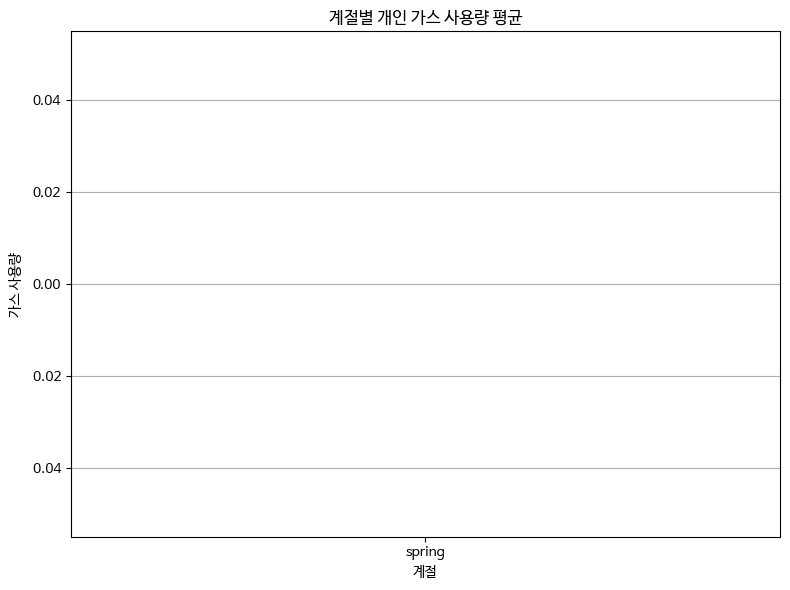

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

seasonal_avg = df_personal_renamed.groupby('계절')['가스'].mean()

# 계절 순서 고정
ordered_seasons = ['spring', 'summer', 'autumn', 'winter']
seasonal_avg = seasonal_avg.reindex(ordered_seasons)

# 그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(seasonal_avg.index, seasonal_avg.values, color='skyblue')

# 막대 위에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.title('계절별 개인 가스 사용량 평균')
plt.xlabel('계절')
plt.ylabel('가스 사용량')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3376454488.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_gas_mean = df_personal_renamed.groupby("계절")["가스"].mean().reindex(season_order)


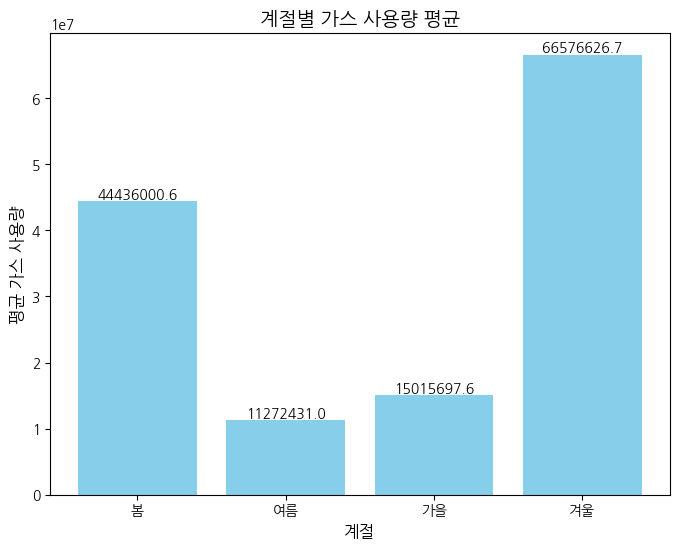

계절
봄     30
여름    30
가을    30
겨울    30
Name: count, dtype: int64


In [14]:
# 1️⃣ Colab 한글 폰트 설치 및 matplotlib 설정
!apt-get install -qq fonts-nanum
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트와 마이너스 기호 정상 표시
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# =============================================
# 2️⃣ df_personal_renamed 가 이미 존재한다고 가정
# '월', '가스' 컬럼은 숫자형으로 변환
numeric_cols = ["월", "가스"]
for col in numeric_cols:
    df_personal_renamed[col] = pd.to_numeric(df_personal_renamed[col], errors='coerce')

# 3️⃣ 계절 컬럼 생성
def get_season(month):
    month = int(month)
    if month in [3,4,5]:
        return "봄"
    elif month in [6,7,8]:
        return "여름"
    elif month in [9,10,11]:
        return "가을"
    else:
        return "겨울"

df_personal_renamed["계절"] = df_personal_renamed["월"].apply(get_season)

# 4️⃣ 계절 순서 지정
season_order = ["봄", "여름", "가을", "겨울"]
df_personal_renamed["계절"] = pd.Categorical(df_personal_renamed["계절"],
                                              categories=season_order,
                                              ordered=True)

# 5️⃣ 계절별 가스 사용량 평균 계산
season_gas_mean = df_personal_renamed.groupby("계절")["가스"].mean().reindex(season_order)

# 6️⃣ 막대그래프
plt.figure(figsize=(8,6))
bars = plt.bar(season_gas_mean.index, season_gas_mean.values, color='skyblue')

plt.title("계절별 가스 사용량 평균", fontsize=14)
plt.xlabel("계절", fontsize=12)
plt.ylabel("평균 가스 사용량", fontsize=12)

# 각 막대 위에 수치 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}',
             ha='center', va='bottom', fontsize=10)

plt.show()

# 7️⃣ 데이터 확인
print(df_personal_renamed["계절"].value_counts())